論文  
https://arxiv.org/abs/2112.10752<br>
<br>
GitHub  
https://github.com/CompVis/stable-diffusion<br>
<br>
<a href="https://colab.research.google.com/github/kaz12tech/ai_demos/blob/master/StableDiffusion_demo_jp.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境セットアップ

## GPU確認

In [ ]:
!nvidia-smi

## GitHubからコード取得

In [ ]:
%cd /content

# !git clone https://github.com/CompVis/stable-diffusion.git

## ライブラリのインストール

In [ ]:
%cd /content

!pip install diffusers==0.2.4 transformers scipy ftfy
!pip install git+https://github.com/rinnakk/japanese-stable-diffusion

## Access Token取得
[Huggingface](https://huggingface.co/)にSign Up後メール認証<br>
その後、[rinna/japanese-stable-diffusion](https://huggingface.co/rinna/japanese-stable-diffusion)にアクセスし以下に同意<br>
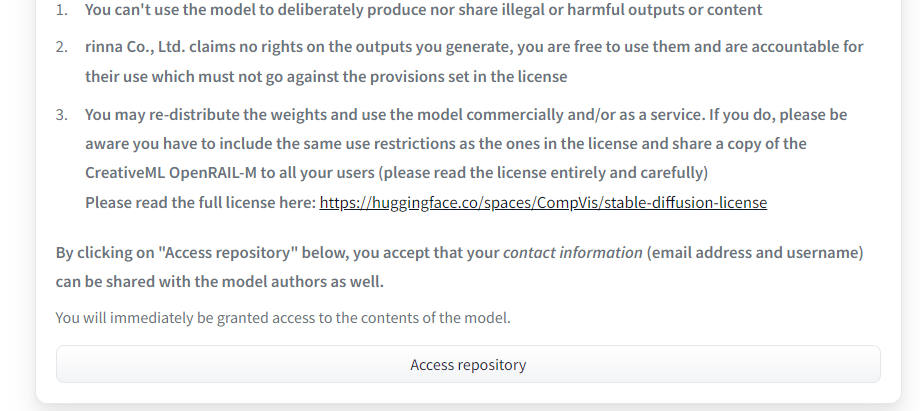

<br><br>
その後、Settings → Access Token
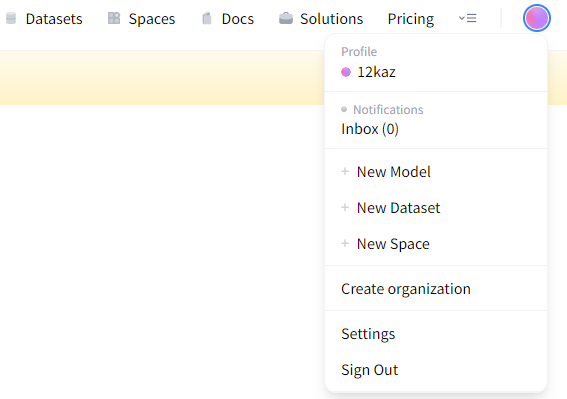


In [ ]:
access_tokens="ここに取得したAccess Tokenを記載" # @param {type:"string"}

## ライブラリのインポート

In [ ]:
import torch
from torch import autocast
from diffusers import LMSDiscreteScheduler
from japanese_stable_diffusion import JapaneseStableDiffusionPipeline

import matplotlib.pyplot as plt

# Text to Image

In [ ]:
prompt = "\u98DF\u30D1\u30F3\u3092\u54A5\u3048\u3066\u4EA4\u5DEE\u70B9\u3092\u8D70\u308B\u9AD8\u6821\u751F" #@param {type:"string"}

## load model

In [ ]:
# load pretrain model
model_id = "rinna/japanese-stable-diffusion"
device = "cuda" if torch.cuda.is_available() else "cpu"
# Use the K-LMS scheduler here instead
scheduler = LMSDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", num_train_timesteps=1000)
pipe = JapaneseStableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_auth_token=access_tokens)
pipe = pipe.to(device)

In [ ]:
!mkdir outputs

num = 5

for i in range(num):
  # モデルにpromptを入力し画像生成
  with autocast("cuda"):
    image = pipe(prompt, guidance_scale=7.5)["sample"][0] 
  # 保存
  image.save(f"outputs/test_{i:04}.png")

In [ ]:
for i in range(num):
  plt.imshow(plt.imread(f"outputs/test_{i:04}.png"))
  plt.axis('off')
  plt.show()